In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from datetime import datetime

In [2]:
def run_isolation_forest(dataframe: pd.DataFrame, contamination=0.15, n_estimators=200):
    IF = (IsolationForest(random_state=0,
                          contamination=contamination,
                          n_estimators=n_estimators)
         )
    IF.fit(dataframe)
    output = IF.predict(dataframe)
    output[output == 1] = 0
    output[output == -1] = 1
    return output

c:\users\aidors\pycharmprojects\pd_pr\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


<Axes: xlabel='Дата', ylabel='Количество пассажиров'>

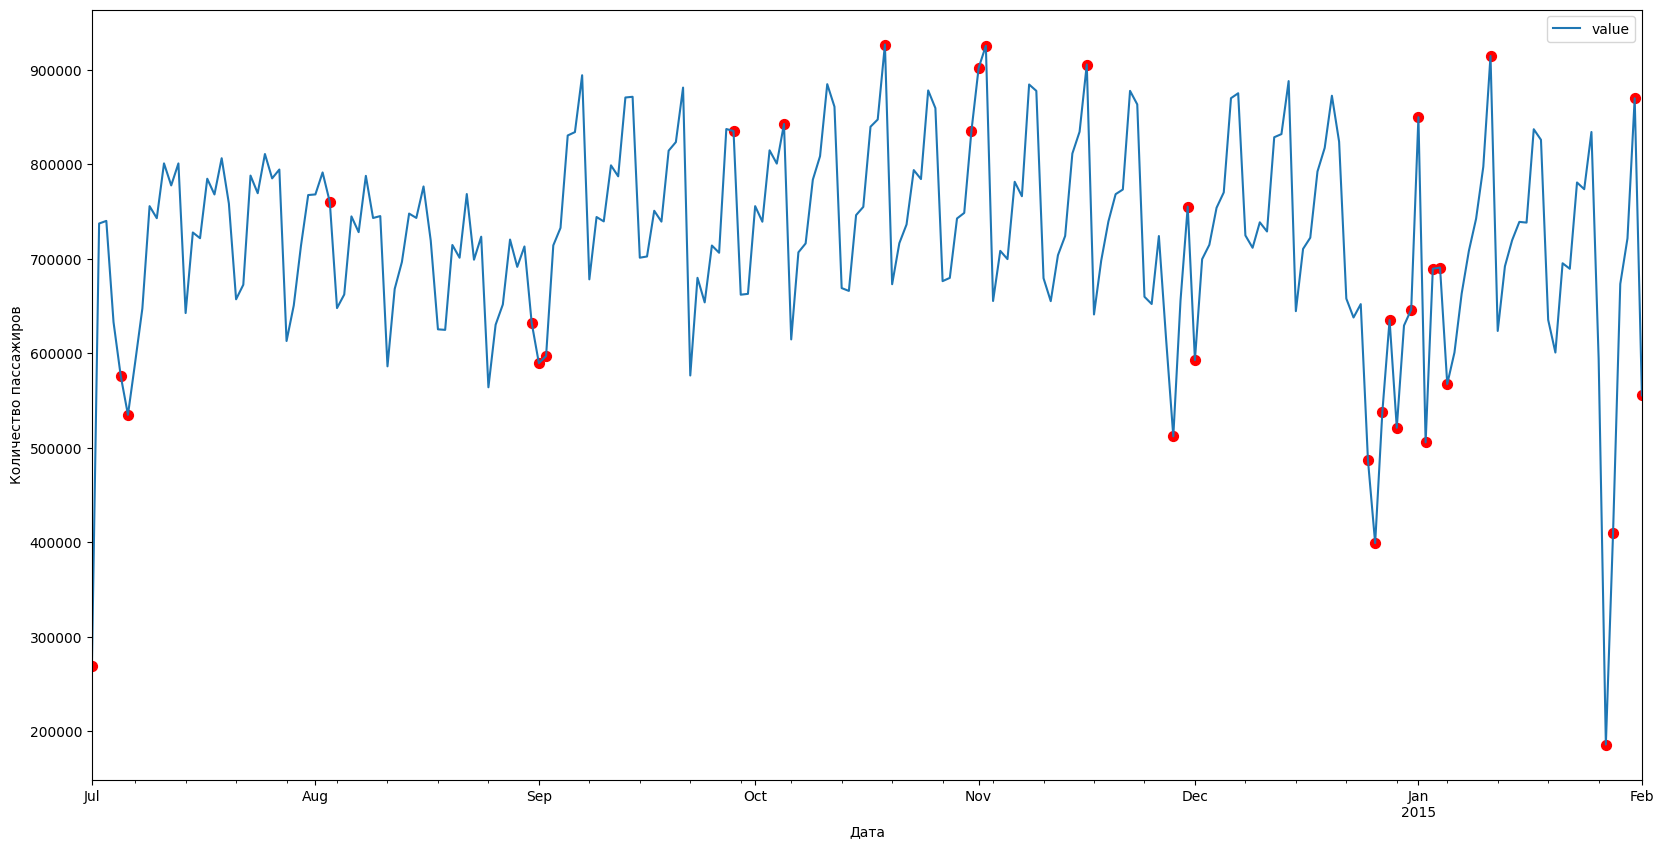

In [3]:
df = pd.read_csv("..\\datasets\\dataset.csv", engine='pyarrow', usecols=["timestamp", "value"])
df_dates = df.copy()
df_dates["timestamp"] = df_dates["timestamp"].dt.round('D')
df_dates = df_dates.groupby(by="timestamp").sum().reset_index()
df_dates["day"] = df_dates["timestamp"].dt.weekday
df_dates['month_day'] = df_dates['timestamp'].dt.day
df_dates = df_dates.set_index("timestamp")
outliers = run_isolation_forest(df_dates)
predictions = df_dates.assign(Outliers=outliers).reset_index()
ax = predictions.plot(x="timestamp", y="value", figsize=(20, 10))
predictions.loc[predictions['Outliers'] == 1].plot.scatter(x="timestamp", y="value", ax=ax, c='r', s=50, xlabel='Дата', ylabel='Количество пассажиров')

c:\users\aidors\pycharmprojects\pd_pr\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


<Axes: xlabel='Дата', ylabel='Количество пассажиров'>

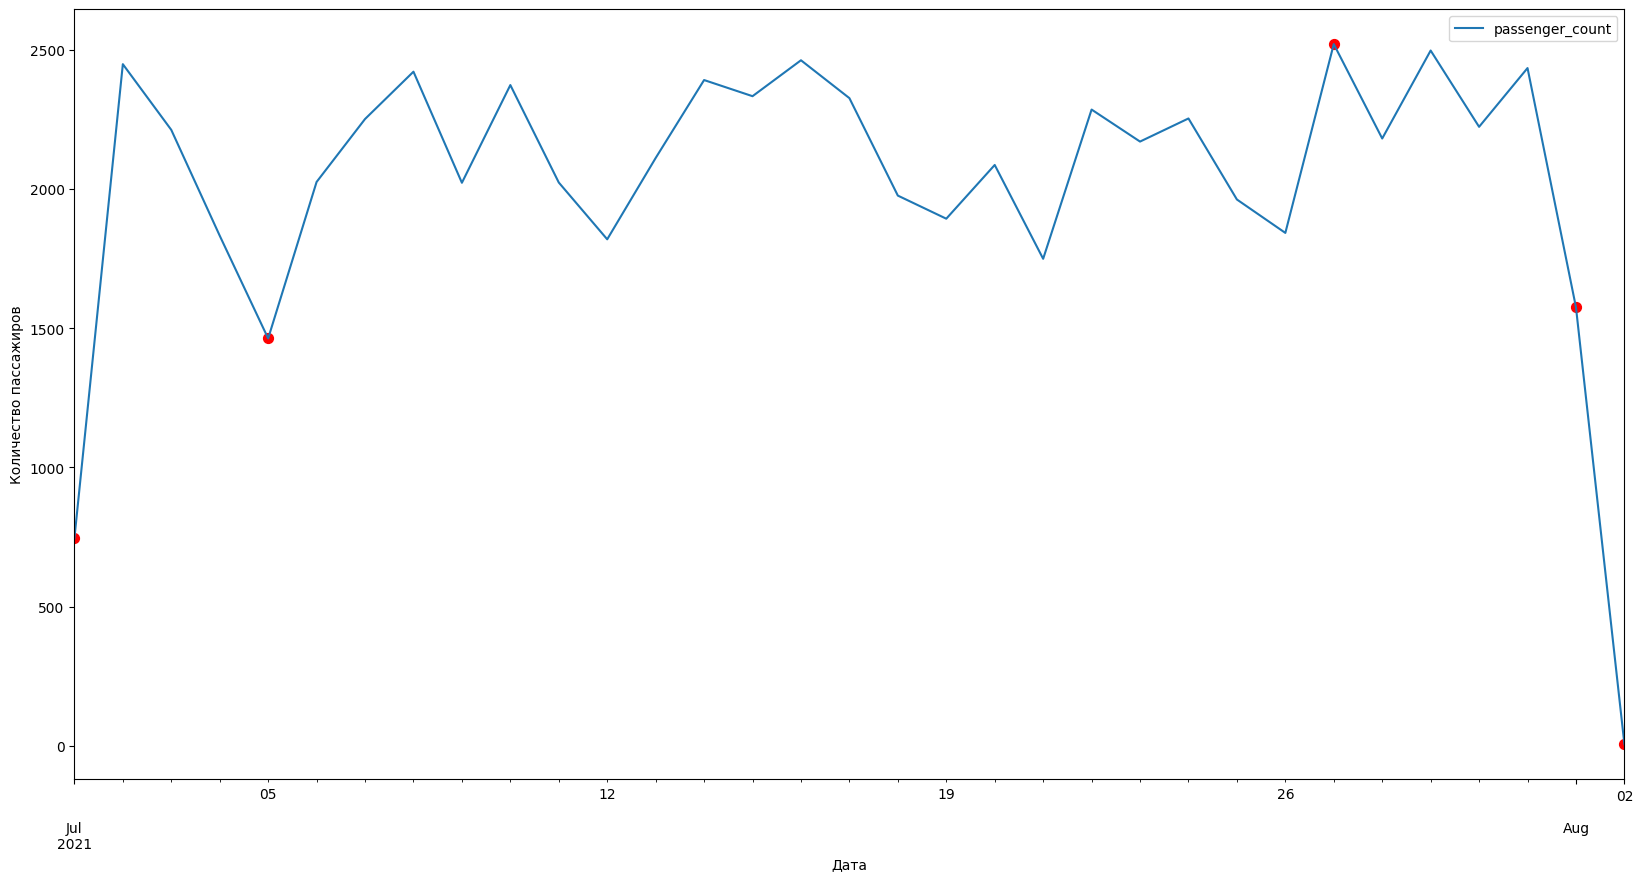

In [4]:
df = pd.read_csv("..\\datasets\\taxi_tripdata.csv", engine='pyarrow', usecols=["lpep_dropoff_datetime", "passenger_count"])
df_dates = df.copy()
df_dates["lpep_dropoff_datetime"] = df_dates["lpep_dropoff_datetime"].dt.round('D')
df_dates = df_dates.groupby(by="lpep_dropoff_datetime").sum().reset_index()
df_dates = df_dates[(df_dates["lpep_dropoff_datetime"].dt.year == 2021) & (df_dates["lpep_dropoff_datetime"].dt.month >= 7)]
df_dates["day"] = df_dates["lpep_dropoff_datetime"].dt.weekday
df_dates = df_dates.set_index("lpep_dropoff_datetime")
outliers = run_isolation_forest(df_dates)
predictions = df_dates.assign(Outliers=outliers).reset_index()
ax = predictions.plot(x="lpep_dropoff_datetime", y="passenger_count", figsize=(20, 10))
predictions.loc[predictions['Outliers'] == 1].plot.scatter(x="lpep_dropoff_datetime", y="passenger_count", ax=ax, c='r', s=50, xlabel='Дата', ylabel='Количество пассажиров')

c:\users\aidors\pycharmprojects\pd_pr\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


<Axes: xlabel='Дата', ylabel='Количество пассажиров'>

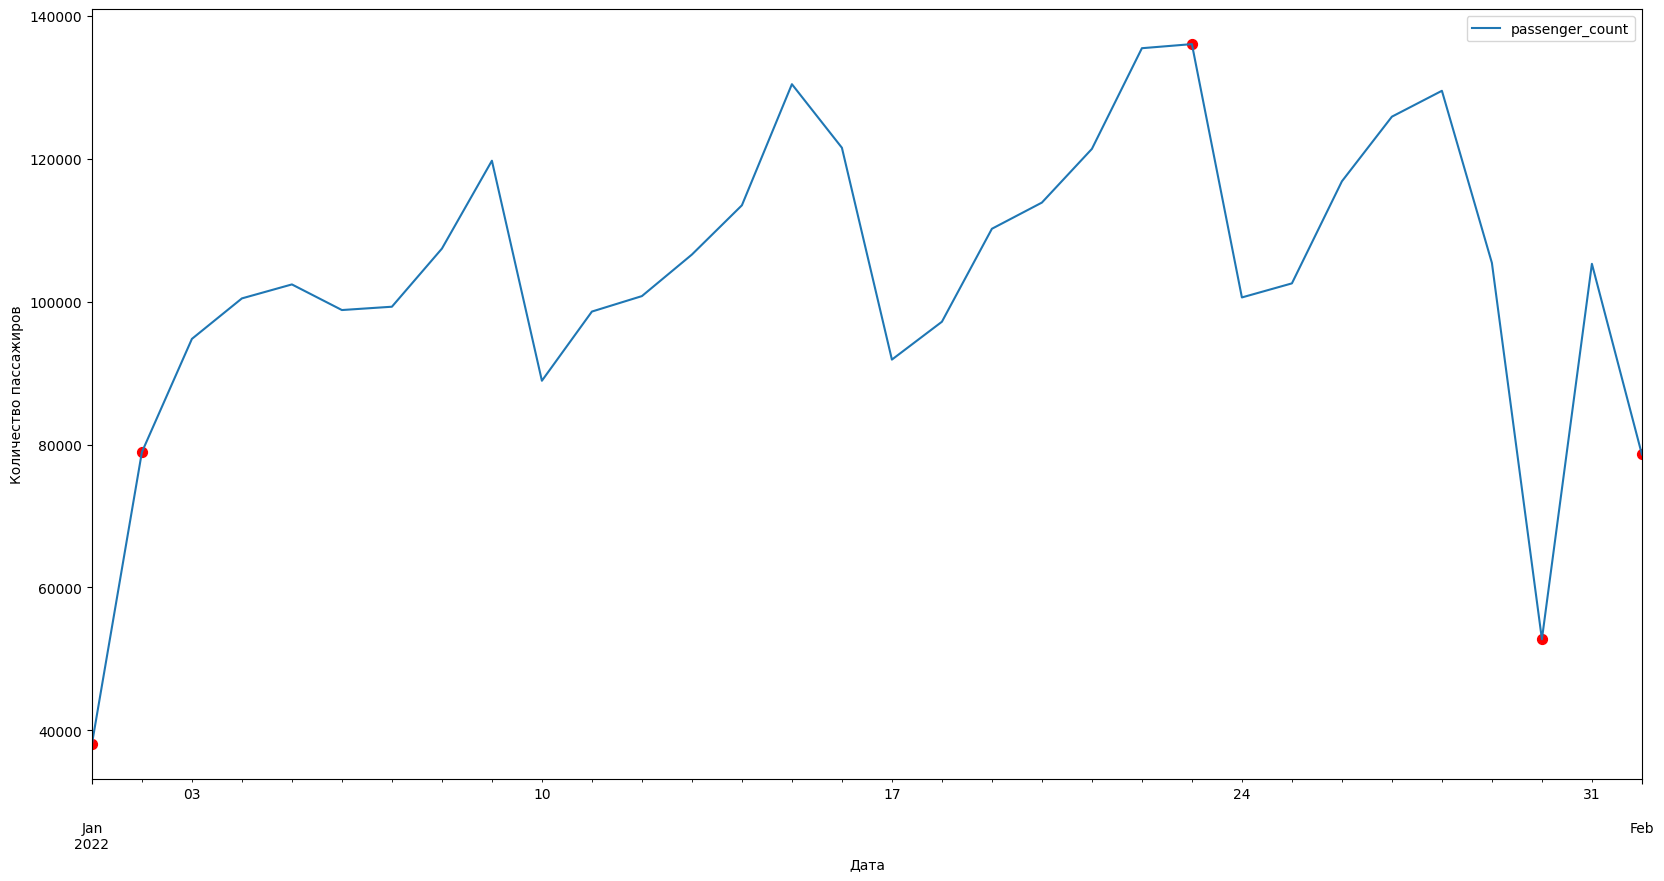

In [5]:
df = pd.read_csv('..\\datasets\\df_all.csv', engine='pyarrow', usecols=["tpep_dropoff_datetime", "passenger_count"])
df_dates = df.copy()
df_dates = df_dates.dropna()
df_dates["tpep_dropoff_datetime"] = df_dates["tpep_dropoff_datetime"].dt.round('D')
df_dates = df_dates.groupby(by="tpep_dropoff_datetime").sum().reset_index()
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df_dates = df_dates[(df_dates['tpep_dropoff_datetime'].dt.year >= 2022) & (df_dates['tpep_dropoff_datetime'] < "2022-02-02")]
df_dates["day"] = df_dates["tpep_dropoff_datetime"].dt.weekday
df_dates = df_dates.set_index("tpep_dropoff_datetime")

outliers = run_isolation_forest(df_dates)
predictions = df_dates.assign(Outliers=outliers).reset_index()
ax = predictions.plot(x="tpep_dropoff_datetime", y="passenger_count", figsize=(20, 10))
predictions.loc[predictions['Outliers'] == 1].plot.scatter(x="tpep_dropoff_datetime", y="passenger_count", ax=ax, c='r', s=50, xlabel='Дата', ylabel='Количество пассажиров')

c:\users\aidors\pycharmprojects\pd_pr\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


<Axes: xlabel='Дата', ylabel='Количество пассажиров'>

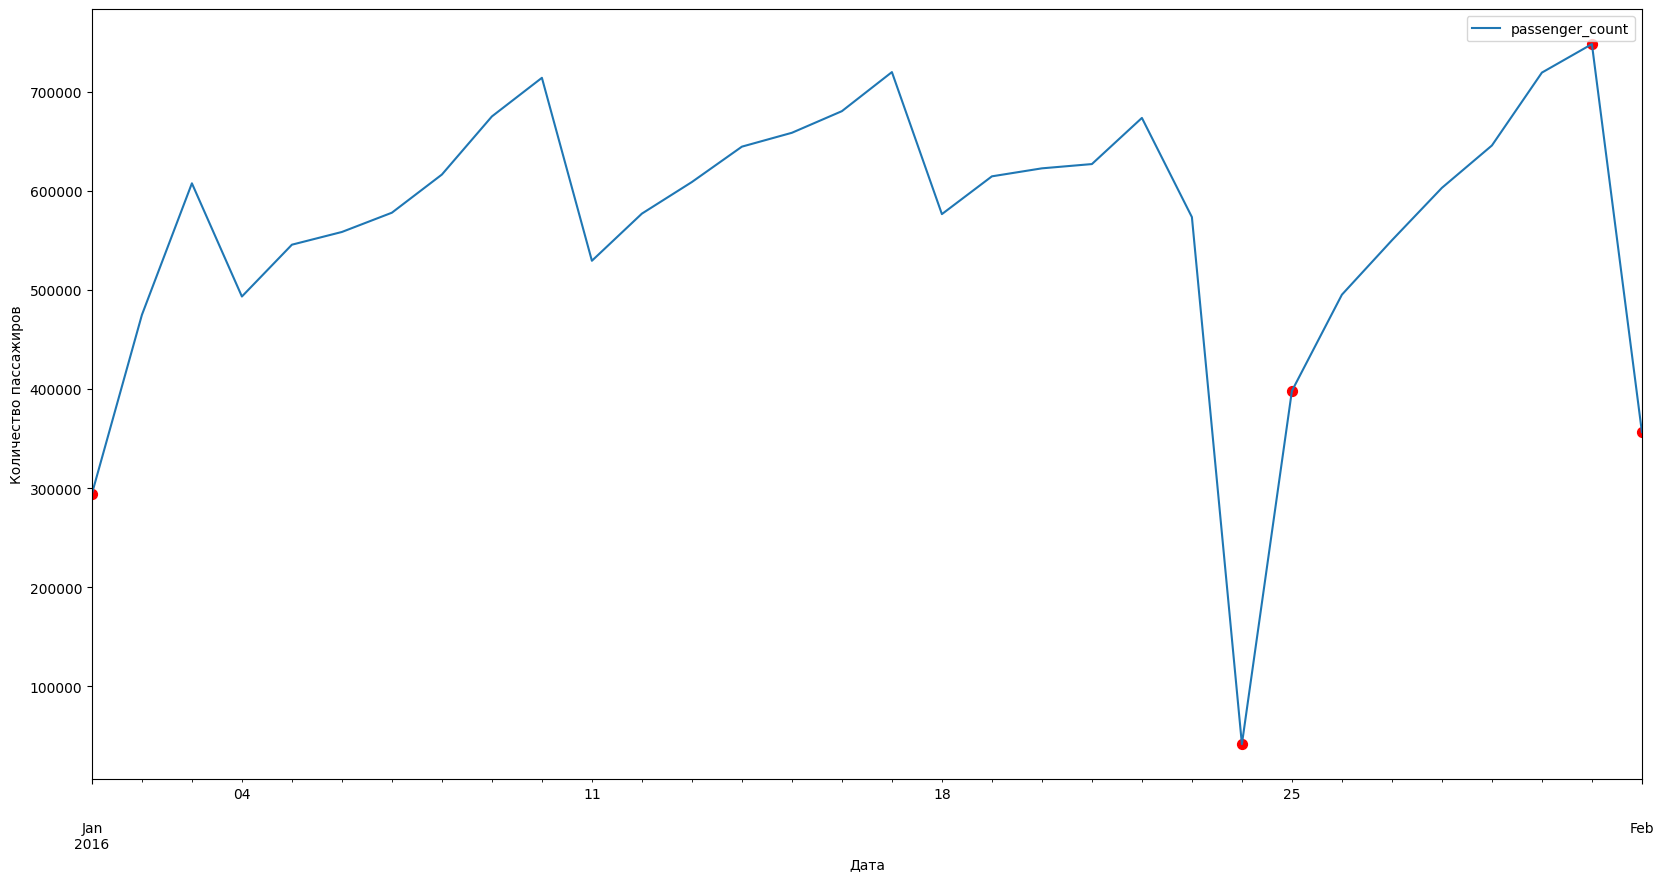

In [6]:
df = pd.read_csv('..\\datasets\\yellow_tripdata_2016-01.csv', usecols=['tpep_dropoff_datetime', 'passenger_count'], engine='pyarrow')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df_dates = df.copy()
df_dates["tpep_dropoff_datetime"] = df_dates["tpep_dropoff_datetime"].dt.round('D')
df_dates = df_dates.groupby(by="tpep_dropoff_datetime").sum().reset_index()
df_dates = df_dates[df_dates['tpep_dropoff_datetime'] < '2016-02-02']
df_dates["day"] = df_dates["tpep_dropoff_datetime"].dt.weekday
df_dates = df_dates.set_index("tpep_dropoff_datetime")
outliers = run_isolation_forest(df_dates)
predictions = df_dates.assign(Outliers=outliers).reset_index()

ax = predictions.plot(x="tpep_dropoff_datetime", y="passenger_count", figsize=(20, 10))
predictions.loc[predictions['Outliers'] == 1].plot.scatter(x="tpep_dropoff_datetime", y="passenger_count", ax=ax, c='r', s=50, xlabel='Дата', ylabel='Количество пассажиров')